In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline  

In [2]:
data=pd.read_csv('mnist.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
a=data.iloc[3,1:].values

In [5]:
a=a.reshape(28,28).astype('uint8')

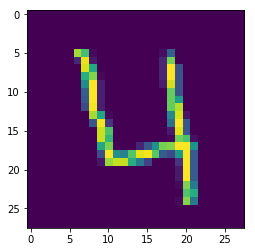

In [6]:
plt.imshow(a)

In [7]:
df_x=data.iloc[:,1:]
df_y=data.iloc[:,0]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [9]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
32576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y_train.head()

32576    5
34735    0
3476     3
27750    0
16211    3
Name: label, dtype: int64

In [11]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [12]:
pred=rf.predict(x_test)

In [13]:
pred

array([0, 4, 0, ..., 0, 3, 1], dtype=int64)

In [14]:
y_test[0:5]

26068    0
11015    4
19342    0
13440    3
29732    7
Name: label, dtype: int64

In [15]:
pred[0:5]

array([0, 4, 0, 3, 7], dtype=int64)

In [16]:
s=y_test.values
count=0

In [17]:
for i in range(len(pred)):
    if pred[i]==s[i]:
        count=count+1

In [18]:
count

8079

In [19]:
len(pred)

8400

In [20]:
8076/8400.0

0.9614285714285714

In [21]:
z=data.iloc[32000:32003,1:]
z

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
32000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
rf.predict(z)

array([6, 7, 0], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [25]:
accuracy_score(y_test,pred)

0.9617857142857142

In [26]:
confusion_matrix(y_test,pred)

array([[826,   0,   1,   0,   0,   1,   3,   0,   3,   0],
       [  0, 891,   5,   4,   2,   0,   0,   4,   1,   0],
       [  5,   4, 815,   5,   3,   0,   2,   4,   2,   3],
       [  2,   2,  19, 797,   0,   8,   1,   7,   9,   6],
       [  2,   1,   1,   0, 738,   0,   3,   0,   1,  15],
       [  3,   1,   0,  15,   1, 717,   7,   0,   5,   4],
       [  3,   2,   1,   0,   1,   3, 846,   0,   2,   0],
       [  2,   6,  14,   2,   1,   0,   0, 853,   5,  15],
       [  1,   7,   4,   6,   5,   7,   1,   2, 759,  11],
       [  5,   0,   7,  16,  12,   2,   0,   4,   9, 837]], dtype=int64)

In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       834
           1       0.97      0.98      0.98       907
           2       0.94      0.97      0.95       843
           3       0.94      0.94      0.94       851
           4       0.97      0.97      0.97       761
           5       0.97      0.95      0.96       753
           6       0.98      0.99      0.98       858
           7       0.98      0.95      0.96       898
           8       0.95      0.95      0.95       803
           9       0.94      0.94      0.94       892

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

